In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
ROOT_DIR = Path().resolve(strict=True).parent
DATA_DIR = f"{ROOT_DIR}/data/"
df = pd.read_excel(f"{DATA_DIR}/raw/compsectorprice.xlsx", index_col=0)

In [3]:
df.head()

,Name,Ticker,Fiscal Year,Shares (Basic),Sector,Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,...,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Stock Price
0,AGILENT TECHNOLOGIES INC,A,2008,363000000.0,Healthcare,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,...,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000,19.773894
1,AGILENT TECHNOLOGIES INC,A,2009,346000000.0,Healthcare,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,...,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000,14.291215
2,AGILENT TECHNOLOGIES INC,A,2010,347000000.0,Healthcare,353000000.0,5.444000e+09,-2.514000e+09,2.930000e+09,-2.364000e+09,...,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000,21.265479
3,AGILENT TECHNOLOGIES INC,A,2011,347000000.0,Healthcare,355000000.0,6.615000e+09,-3.086000e+09,3.529000e+09,-2.458000e+09,...,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000,27.089809
4,AGILENT TECHNOLOGIES INC,A,2012,348000000.0,Healthcare,353000000.0,6.858000e+09,-3.254000e+09,3.604000e+09,-2.485000e+09,...,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000,26.256647


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20272
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             20273 non-null  object 
 1   Ticker                                           20273 non-null  object 
 2   Fiscal Year                                      20273 non-null  int64  
 3   Shares (Basic)                                   20072 non-null  float64
 4   Sector                                           11376 non-null  object 
 5   Shares (Diluted)                                 20072 non-null  float64
 6   Revenue                                          19983 non-null  float64
 7   Cost of Revenue                                  18411 non-null  float64
 8   Gross Profit                                     19993 non-null  float64
 9   Operating Expenses          

In [5]:
df.shape

(20273, 63)

In [6]:
df.dtypes

Name                                   object
Ticker                                 object
Fiscal Year                             int64
Shares (Basic)                        float64
Sector                                 object
                                       ...   
Cash from (Repayment of) Debt         float64
Cash from (Repurchase of) Equity      float64
Net Cash from Financing Activities    float64
Net Change in Cash                      int64
Stock Price                           float64
Length: 63, dtype: object

In [7]:
{col: set(map(type, df[col])) for col in df.select_dtypes(include=[object])}

{'Name': {str}, 'Ticker': {str}, 'Sector': {float, str}}

In [8]:
df.isna().sum()

Name                                     0
Ticker                                   0
Fiscal Year                              0
Shares (Basic)                         201
Sector                                8897
                                      ... 
Cash from (Repayment of) Debt         2659
Cash from (Repurchase of) Equity      2558
Net Cash from Financing Activities      61
Net Change in Cash                       0
Stock Price                           3992
Length: 63, dtype: int64

<AxesSubplot: >

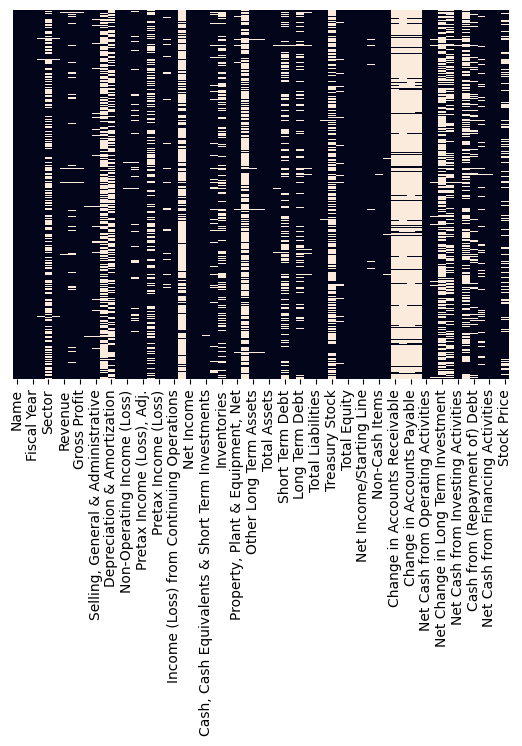

In [9]:
# Hetmap to shoy null values
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

In [10]:
# Sector can be usefull but not essential
df["Sector"] = df["Sector"].fillna("Unknown")

In [11]:
# As the rest null values are probably 0 and aren't set because of that we can fill them with 0 instead of
# the mean or somenthing else
df = df.fillna(0)

In [12]:
df.isna().sum()

Name                                  0
Ticker                                0
Fiscal Year                           0
Shares (Basic)                        0
Sector                                0
                                     ..
Cash from (Repayment of) Debt         0
Cash from (Repurchase of) Equity      0
Net Cash from Financing Activities    0
Net Change in Cash                    0
Stock Price                           0
Length: 63, dtype: int64

/tmp/ipykernel_11892/2084752675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=.5)


<AxesSubplot: >

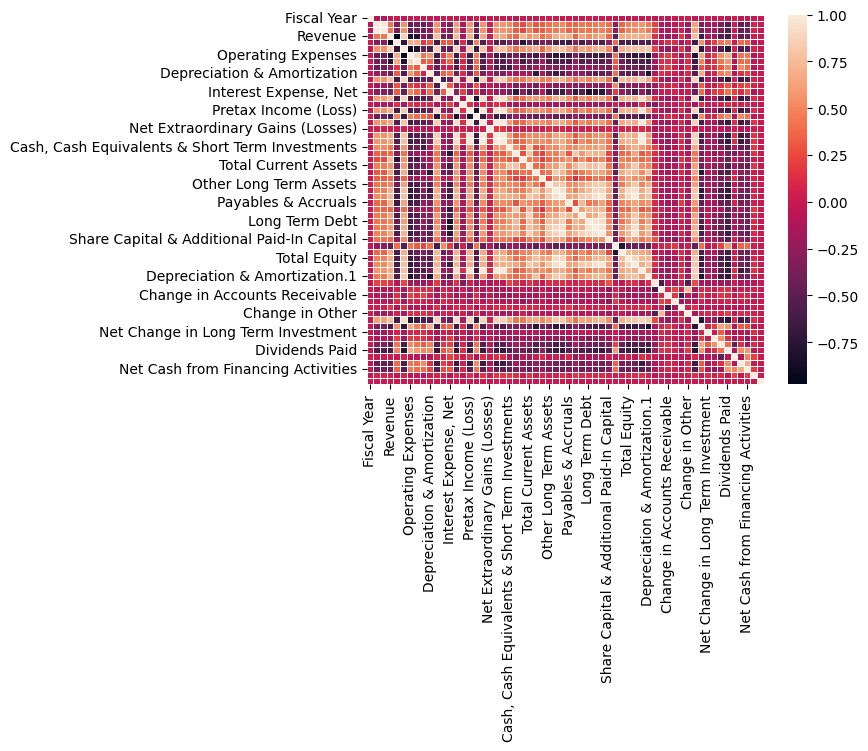

In [24]:
sns.heatmap(df.corr(), linewidths=.5)

In [15]:
df["Ticker"].unique()

array(['A', 'AA', 'AAC_delist', ..., 'ZVO', 'ZYNE', 'ZYXI'], dtype=object)

In [16]:
df["Sector"].value_counts()

Unknown                   8897
Healthcare                2008
Technology                2003
Consumer Cyclical         1905
Industrials               1701
Energy                     711
Consumer Defensive         585
Communication Services     578
Basic Materials            541
Financial Services         475
Real Estate                471
Utilities                  398
Name: Sector, dtype: int64

In [17]:
df.groupby(["Sector"]).mean()

/tmp/ipykernel_11892/1780440792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Sector"]).mean()


,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,...,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Stock Price
Sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,2014.243993,1.815812e+08,1.838772e+08,6.512524e+09,-4.939546e+09,1.572978e+09,-8.496309e+08,-6.479859e+08,-9.399606e+07,-9.587555e+07,...,-4.243274e+08,7.029545e+06,-1.276479e+08,-5.106846e+08,-1.955997e+08,3.222574e+07,-8.060620e+07,-2.884700e+08,1.259378e+06,1.168575e+02
Communication Services,2014.619377,6.320625e+08,6.497274e+08,1.274928e+10,-5.299182e+09,7.450102e+09,-5.194616e+09,-3.025676e+09,-3.931423e+08,-1.253332e+09,...,-1.528757e+09,-2.585339e+08,-4.779814e+08,-2.316031e+09,-5.079100e+08,5.453424e+08,-4.150235e+08,-7.183875e+08,1.225576e+08,3.964065e+01
Consumer Cyclical,2014.332283,2.114931e+08,2.164072e+08,8.315955e+09,-5.801809e+09,2.514146e+09,-1.809870e+09,-1.371016e+09,-2.011930e+07,-1.092173e+08,...,-3.726427e+08,-1.661753e+07,-3.975900e+08,-5.500744e+08,-1.484060e+08,-7.552918e+07,-2.606605e+08,-2.716933e+08,2.967931e+07,5.914697e+01
Consumer Defensive,2014.536752,5.592909e+08,5.684835e+08,2.705700e+10,-1.906343e+10,7.993569e+09,-5.592458e+09,-5.218777e+09,-4.478595e+06,-1.037138e+08,...,-7.252064e+08,8.722680e+06,-3.573139e+08,-1.086927e+09,-8.601787e+08,3.443908e+08,-5.638197e+08,-1.136120e+09,7.603274e+07,4.312984e+01
Energy,2014.496484,4.066166e+08,4.086372e+08,1.972073e+10,-1.363390e+10,6.086832e+09,-3.436887e+09,-8.084896e+08,-1.353701e+08,-1.277144e+09,...,-2.023485e+09,-7.267892e+06,-1.716547e+08,-2.261216e+09,-5.655017e+08,2.642042e+08,-2.021654e+08,-5.472093e+08,-2.005685e+06,5.366251e+01
Financial Services,2014.307368,2.762662e+08,3.035004e+08,8.069021e+09,-4.442823e+09,3.626198e+09,-1.898627e+09,-1.297281e+09,-2.114578e+07,-1.115253e+08,...,-3.782453e+08,-1.808433e+08,-5.008621e+08,-1.074890e+09,-2.448591e+08,3.084606e+08,-2.971269e+08,-2.957086e+08,1.596716e+08,4.546948e+03
Healthcare,2014.780876,2.237293e+08,2.268723e+08,7.702687e+09,-5.058098e+09,2.648682e+09,-1.832223e+09,-1.199563e+09,-3.676202e+08,-8.850761e+07,...,-1.591615e+08,-8.760587e+07,-3.553099e+08,-5.427825e+08,-2.266193e+08,2.315688e+08,-2.144512e+08,-2.346944e+08,7.325964e+07,2.714904e+03
Industrials,2014.188713,2.418924e+08,2.442476e+08,8.667718e+09,-6.117088e+09,2.550630e+09,-1.486462e+09,-8.187901e+08,-8.304343e+07,-1.674637e+08,...,-4.902799e+08,-3.618483e+06,-1.352745e+08,-5.412984e+08,-2.484655e+08,2.461664e+07,-2.799693e+08,-4.974059e+08,2.747067e+07,4.774040e+01
Real Estate,2014.543524,1.856796e+08,1.873997e+08,1.978010e+09,-7.960711e+08,1.181939e+09,-7.255423e+08,-2.328346e+08,-2.397076e+06,-3.049263e+08,...,-3.704341e+08,4.082114e+08,-1.814893e+08,-7.990758e+08,-3.425267e+08,3.907550e+08,2.392842e+08,2.054844e+08,1.664514e+07,4.693467e+01


In [18]:
df_by_sectors = df.groupby(["Sector", "Fiscal Year"]).mean()
df_by_sectors = df_by_sectors.sort_values(by=["Sector",'Fiscal Year'], ascending=False)

/tmp/ipykernel_11892/176091833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_sectors = df.groupby(["Sector", "Fiscal Year"]).mean()


In [19]:
# Indexes can be accessed using .loc[__name_index__]
df_by_sectors.loc["Basic Materials"]

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),...,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Stock Price
Fiscal Year,,,,,,,,,,,,,,,,,,,,,
2020,9.699551e+07,9.780870e+07,3.002906e+09,-1.749014e+09,1.253892e+09,-8.816480e+08,-7.894240e+08,-2.595000e+06,-8.771700e+07,3.722440e+08,...,-7.387800e+07,9.925000e+05,-1.105435e+08,-1.812360e+08,-1.282860e+08,4.963550e+07,-7.362750e+07,-1.525550e+08,1.049505e+08,96.043606
2019,2.063796e+08,2.074257e+08,6.454103e+09,-4.770998e+09,1.683104e+09,-1.024809e+09,-7.174846e+08,-9.620630e+07,-1.921022e+08,6.582959e+08,...,-5.062565e+08,-1.251667e+04,9.080209e+07,-4.312537e+08,-2.232840e+08,-3.134989e+08,-1.010615e+08,-8.656915e+08,-3.991478e+08,55.702375
2018,2.092593e+08,2.109624e+08,6.770176e+09,-4.910891e+09,1.859285e+09,-9.974100e+08,-7.353304e+08,-1.087743e+08,-1.413706e+08,8.618752e+08,...,-4.652746e+08,2.606276e+07,-1.053772e+08,-5.143534e+08,-2.646999e+08,-7.920603e+07,-2.354434e+08,-5.100020e+08,-1.655349e+08,58.335988
2017,1.843453e+08,1.856963e+08,7.493830e+09,-5.633839e+09,1.859990e+09,-9.423769e+08,-6.982027e+08,-1.145536e+08,-1.192977e+08,9.176134e+08,...,-4.138372e+08,4.227377e+07,-6.229873e+07,-1.394842e+08,-2.683911e+08,-1.515346e+05,-6.646312e+07,-3.585947e+08,2.228419e+08,58.297770
2016,1.558109e+08,1.574066e+08,4.751284e+09,-3.604991e+09,1.146293e+09,-6.934036e+08,-5.659600e+08,-4.896080e+07,-6.793916e+07,4.528894e+08,...,-3.341863e+08,-7.333000e+06,1.439254e+08,-1.968491e+08,-1.343865e+08,-1.288827e+08,-6.706425e+07,-3.247433e+08,2.002489e+08,50.567508
2015,1.605072e+08,1.634375e+08,5.587639e+09,-4.569357e+09,1.018282e+09,-7.185497e+08,-5.537215e+08,-8.045326e+07,-6.848318e+07,2.997327e+08,...,-4.748368e+08,-1.762636e+07,-1.766299e+08,-6.589749e+08,-1.639789e+08,2.528811e+08,-1.409767e+08,-1.382310e+08,-4.021332e+07,67.603207
2014,1.499170e+08,1.514362e+08,6.128715e+09,-4.685591e+09,1.443125e+09,-8.343959e+08,-6.720581e+08,-8.570735e+07,-6.890026e+07,6.087288e+08,...,-3.388610e+08,1.107413e+06,-2.026866e+08,-5.312302e+08,-1.503226e+08,2.620984e+08,-2.275299e+08,-1.343402e+08,3.868388e+06,145.498951
2013,1.798040e+08,1.840514e+08,7.241235e+09,-5.556576e+09,1.684659e+09,-8.078194e+08,-6.394349e+08,-9.582676e+07,-6.076513e+07,8.768401e+08,...,-4.871759e+08,1.919271e+07,-2.035137e+08,-6.995734e+08,-2.161668e+08,1.610624e+08,-1.164414e+08,-2.091900e+08,3.585277e+07,42.758976
2012,1.711335e+08,1.730154e+08,6.552799e+09,-4.967837e+09,1.584962e+09,-8.147328e+08,-6.332461e+08,-1.016172e+08,-6.741850e+07,7.702291e+08,...,-4.600666e+08,3.662005e+07,-1.544470e+08,-6.021105e+08,-1.844706e+08,7.442783e+07,-4.101675e+07,-1.814221e+08,-2.589743e+07,771.012836


TODO
- Growth per sector
- Biggest company growth per sector
- Calculate ratios
- Compare ratios per sector
- Find relation Growth / Ratios